In [504]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [505]:
#Importing The Dataset
df = pd.read_csv('Bengaluru_House_Data.csv')

In [506]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [507]:
#Checking Total Number Of Null Values
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [508]:
# Fill missing values in the 'size' column with the mean
df['size'].fillna(value=df['size'].mode(), inplace=True)

# Fill missing values in the 'bath' column using forward fill method
df['bath'].fillna(method='ffill', inplace=True)
df['balcony'].fillna(method='ffill', inplace=True)
# Drop columns 'society' and 'availability'
df = df.drop(columns= ['society', 'availability','location'])

# Convert 'total_sqft' to float64
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

In [509]:
df.isnull().sum()

area_type       0
size           16
total_sqft    247
bath            0
balcony         0
price           0
dtype: int64

In [510]:
df.dropna(inplace=True)

In [511]:
df['size'].value_counts()

2 BHK         5148
3 BHK         4254
4 Bedroom      811
4 BHK          546
3 Bedroom      542
1 BHK          492
2 Bedroom      325
5 Bedroom      294
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           55
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            12
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [512]:
#This is Used To Split All the Values For SPLLITING LAMDA is used
df['oda'] = df['size'].apply(lambda x: int(x.split(' ')[0]))


In [513]:
df = df.drop(['size'],axis='columns')
df.head()

,area_type,total_sqft,bath,balcony,price,oda
0,Super built-up Area,1056.0,2.0,1.0,39.07,2
1,Plot Area,2600.0,5.0,3.0,120.00,4
2,Built-up Area,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,1200.0,2.0,1.0,51.00,2


In [514]:
#Reindexing Of Columns
df = df.reindex(columns=['area_type','total_sqft', 'bath','balcony','oda','price'])

In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13065 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13065 non-null  object 
 1   total_sqft  13065 non-null  float64
 2   bath        13065 non-null  float64
 3   balcony     13065 non-null  float64
 4   oda         13065 non-null  int64  
 5   price       13065 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 714.5+ KB


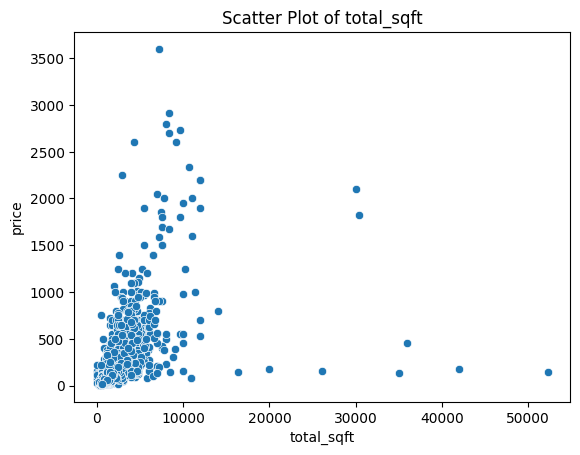

In [516]:
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Scatter Plot of total_sqft')
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.show()

In [517]:
df.drop(columns='area_type', inplace=True)

In [518]:
df

,total_sqft,bath,balcony,oda,price
0,1056.0,2.0,1.0,2,39.07
1,2600.0,5.0,3.0,4,120.00
2,1440.0,2.0,3.0,3,62.00
3,1521.0,3.0,1.0,3,95.00
4,1200.0,2.0,1.0,2,51.00
...,...,...,...,...,...
13315,3453.0,4.0,0.0,5,231.00
13316,3600.0,5.0,0.0,4,400.00
13317,1141.0,2.0,1.0,2,60.00
13318,4689.0,4.0,1.0,4,488.00


In [519]:
#Calculating Square per ft Price
df['sqft_price']=df['total_sqft']*df['price']

In [520]:
#Normalisation
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [521]:
df=df_scaled.copy()

In [522]:
X = df.drop(['price'],axis='columns')
y = df.price

In [523]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [524]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [525]:
regressor.score(X_train,y_train)

0.9999999999997012

In [526]:
y_pred =regressor.predict(X_test)

In [527]:
y_pred

array([0.02004454, 0.02505568, 0.0785078 , ..., 0.01308463, 0.01252784,
       0.01082962])

In [528]:
result_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
result_df

,Actual,Predicted
0,0.020045,0.020045
1,0.025334,0.025056
2,0.078508,0.078508
3,0.022829,0.023385
4,0.009076,0.009090
...,...,...
3915,0.015173,0.015173
3916,0.009942,0.009942
3917,0.013085,0.013085
3918,0.012249,0.012528


from matplotlib import pyplot as plt
result_df['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_df['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_df.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
result_df['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
result_df['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

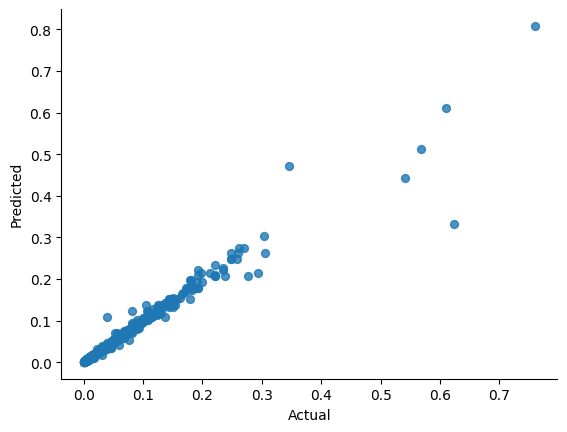

In [532]:
from matplotlib import pyplot as plt
result_df.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

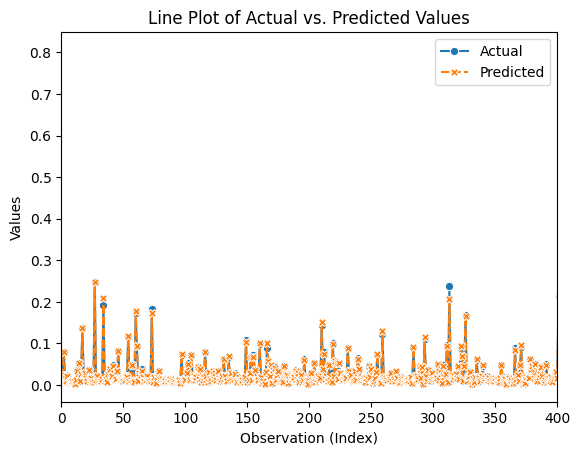

In [529]:
sns.lineplot(data=result_df, markers=True)
plt.xlabel('Observation (Index)')
plt.ylabel('Values')
plt.xlim(0,400)
plt.title('Line Plot of Actual vs. Predicted Values')
plt.show()

In [530]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
acc = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is: ",acc )
score=r2_score(y_pred,y_test)
print("R-squared (coefficient of determination) score is : {:.2f}%".format(score * 100))
score=regressor.score(X_train,y_train)
print("Accuracy for Training: {:.2f}%".format(score * 100))
score=regressor.score(X_test,y_test)
print("Accuracy for Testing: {:.2f}%".format(score * 100))

Mean Absolute Error is:  0.0008124708820053636
R-squared (coefficient of determination) score is : 96.97%
Accuracy for Training: 100.00%
Accuracy for Testing: 97.17%
